In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/IMDB Dataset.csv', on_bad_lines='skip', engine='python')

In [ ]:
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
df.isnull().sum()

,0
review,0
sentiment,0


# Lowercase Conversion

In [ ]:
#convert all text to lowercase
df['processed_reviews'] = df['review'].str.lower()

# remove html tags

In [ ]:
import re
def remove_html_tags(text):
  return re.sub(r'<[^>]*>', '', text)
df['processed_reviews'] = df['processed_reviews'].apply(remove_html_tags)

# remove punctuation and special characters

In [ ]:
def remove_special_characters(text):
  return re.sub(r'[^a-zA-Z\s]', '', text)
df['processed_reviews'] = df['processed_reviews'].apply(remove_special_characters)

# Tokenization

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab') # Download the punkt_tab resource

# Tokenization
df['tokens'] = df['processed_reviews'].apply(word_tokenize)

# Display the updated DataFrame
print(df.head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


                                              review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   

                                   processed_reviews  \
0  one of the other reviewers has mentioned that ...   
1  a wonderful little production the filming tech...   
2  i thought this was a wonderful way to spend ti...   
3  basically theres a family where a little boy j...   
4  petter matteis love in the time of money is a ...   

                                              tokens  
0  [one, of, the, other, reviewers, has, mentione...  
1  [a, wonderful, little, production, the, filmin...  
2  [i, thought, this, was, a, wonderful, way, to,...  
3  [basically, theres, a, family, where, a, li

# Remove stop words

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df.head()

,review,sentiment,processed_reviews,tokens
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,"[one, reviewers, mentioned, watching, oz, epis..."
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...,"[wonderful, little, production, filming, techn..."
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,"[thought, wonderful, way, spend, time, hot, su..."
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...,"[basically, theres, family, little, boy, jake,..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...,"[petter, matteis, love, time, money, visually,..."


# Stemming

In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
df['tokens'] = df['tokens'].apply(lambda x: [stemmer.stem(word) for word in x])

In [ ]:
#join token back into sentences
df['processed_reviews'] = df['tokens'].apply(lambda x: ' '.join(x))


In [ ]:
df.isnull().sum()

,0
review,0
sentiment,0
processed_reviews,0
tokens,0


In [ ]:
df.head()

,review,sentiment,processed_reviews,tokens
0,One of the other reviewers has mentioned that ...,positive,one review mention watch oz episod youll hook ...,"[one, review, mention, watch, oz, episod, youl..."
1,A wonderful little production. <br /><br />The...,positive,wonder littl product film techniqu unassum old...,"[wonder, littl, product, film, techniqu, unass..."
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...,"[thought, wonder, way, spend, time, hot, summe..."
3,Basically there's a family where a little boy ...,negative,basic there famili littl boy jake think there ...,"[basic, there, famili, littl, boy, jake, think..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visual stun film...,"[petter, mattei, love, time, money, visual, st..."


# Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['processed_reviews'])
y = df['sentiment']

In [ ]:
#split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train machine learning models

**1) Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)



In [ ]:
# Evaluate the model
print("\nLogistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, pos_label="positive"))
print("Recall:", recall_score(y_test, y_pred, pos_label="positive"))
print("F1 Score:", f1_score(y_test, y_pred, pos_label="positive"))



Logistic Regression:
Accuracy: 0.8832
Precision: 0.8725697786333012
Recall: 0.8995832506449692
F1 Score: 0.8858706273206958


**2) Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test)




In [ ]:
# Evaluate the model
print("\nNaive Bayes:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Precision:", precision_score(y_test, y_pred_nb, pos_label="positive"))
print("Recall:", recall_score(y_test, y_pred_nb, pos_label="positive"))
print("F1 Score:", f1_score(y_test, y_pred_nb, pos_label="positive"))


Naive Bayes:
Accuracy: 0.8453
Precision: 0.8418167580266249
Recall: 0.8533439174439373
F1 Score: 0.8475411451660589


# Train and Evaluate Deep Learning Models

**LSTM Model**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [ ]:
# Prepare the data for LSTM model
X = df['processed_reviews']  # reviews
y = df['sentiment']  # sentiment labels


In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Tokenize reviews
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

In [ ]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [ ]:
# Pad sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=100)
X_test_pad = pad_sequences(X_test_seq, maxlen=100)

In [ ]:
import tensorflow as tf

# Check if GPU is being used
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  1


In [ ]:
# Build the LSTM model
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=100),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Binary classification (positive/negative)
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Convert sentiment labels to numerical representations
y_train = y_train.map({'positive': 1, 'negative': 0})
y_test = y_test.map({'positive': 1, 'negative': 0})

# Now, proceed with model training:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test))

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 15ms/step - accuracy: 0.7806 - loss: 0.4416 - val_accuracy: 0.8635 - val_loss: 0.3164
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8962 - loss: 0.2601 - val_accuracy: 0.8715 - val_loss: 0.2980
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9149 - loss: 0.2136 - val_accuracy: 0.8727 - val_loss: 0.3258
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9374 - loss: 0.1702 - val_accuracy: 0.8717 - val_loss: 0.3306
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9528 - loss: 0.1345 - val_accuracy: 0.8682 - val_loss: 0.4047


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict with LSTM model
y_pred = (model.predict(X_test_pad) > 0.5).astype("int32")

# Evaluate the model
print("\nLSTM Model:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, pos_label=1))
print("Recall:", recall_score(y_test, y_pred, pos_label=1))
print("F1 Score:", f1_score(y_test, y_pred, pos_label=1))


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step

LSTM Model:
Accuracy: 0.8682
Precision: 0.8724724724724725
Recall: 0.8648541377257393
F1 Score: 0.868646601554714


## **RNN Model**

In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Embedding
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score




In [ ]:
# Build the RNN model
rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=10000, output_dim=128, input_length=100))  # Adjust input_dim and input_length based on your data
rnn_model.add(SimpleRNN(units=128, activation='relu'))
rnn_model.add(Dense(1, activation='sigmoid'))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Compile the model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [ ]:
# Train the model
rnn_model.fit(X_train_pad, y_train, epochs=3, batch_size=32, validation_data=(X_test_pad, y_test))



Epoch 1/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.7213 - loss: 0.5220 - val_accuracy: 0.8645 - val_loss: 0.3152
Epoch 2/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.8769 - loss: 0.3001 - val_accuracy: 0.8646 - val_loss: 0.3281
Epoch 3/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.8919 - loss: 0.2698 - val_accuracy: 0.8697 - val_loss: 0.3114


In [ ]:
# Evaluate the RNN model
y_pred_rnn = (rnn_model.predict(X_test_pad) > 0.5).astype("int32")

# Print Evaluation Metrics
print("RNN Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rnn))
print("Precision:", precision_score(y_test, y_pred_rnn))
print("Recall:", recall_score(y_test, y_pred_rnn))
print("F1 Score:", f1_score(y_test, y_pred_rnn))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
RNN Model Evaluation:
Accuracy: 0.8697
Precision: 0.8725568408456322
Recall: 0.8682278229807502
F1 Score: 0.8703869491694022


# **CNN Model**

In [ ]:
from keras.layers import Conv1D, MaxPooling1D, Flatten

# Build the CNN model
cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=10000, output_dim=128, input_length=100))  # Adjust input_dim and input_length based on your data
cnn_model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
cnn_model.fit(X_train_pad, y_train, epochs=3, batch_size=32, validation_data=(X_test_pad, y_test))

Epoch 1/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7777 - loss: 0.4309 - val_accuracy: 0.8749 - val_loss: 0.2867
Epoch 2/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9172 - loss: 0.2131 - val_accuracy: 0.8716 - val_loss: 0.3188
Epoch 3/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9748 - loss: 0.0803 - val_accuracy: 0.8645 - val_loss: 0.4655


In [ ]:
# Evaluate the CNN model
y_pred_cnn = (cnn_model.predict(X_test_pad) > 0.5).astype("int32")

# Print Evaluation Metrics
print("CNN Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_cnn))
print("Precision:", precision_score(y_test, y_pred_cnn))
print("Recall:", recall_score(y_test, y_pred_cnn))
print("F1 Score:", f1_score(y_test, y_pred_cnn))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
CNN Model Evaluation:
Accuracy: 0.8645
Precision: 0.8719709208400647
Recall: 0.8569160547727723
F1 Score: 0.8643779401461316


# Model comparison through visualization

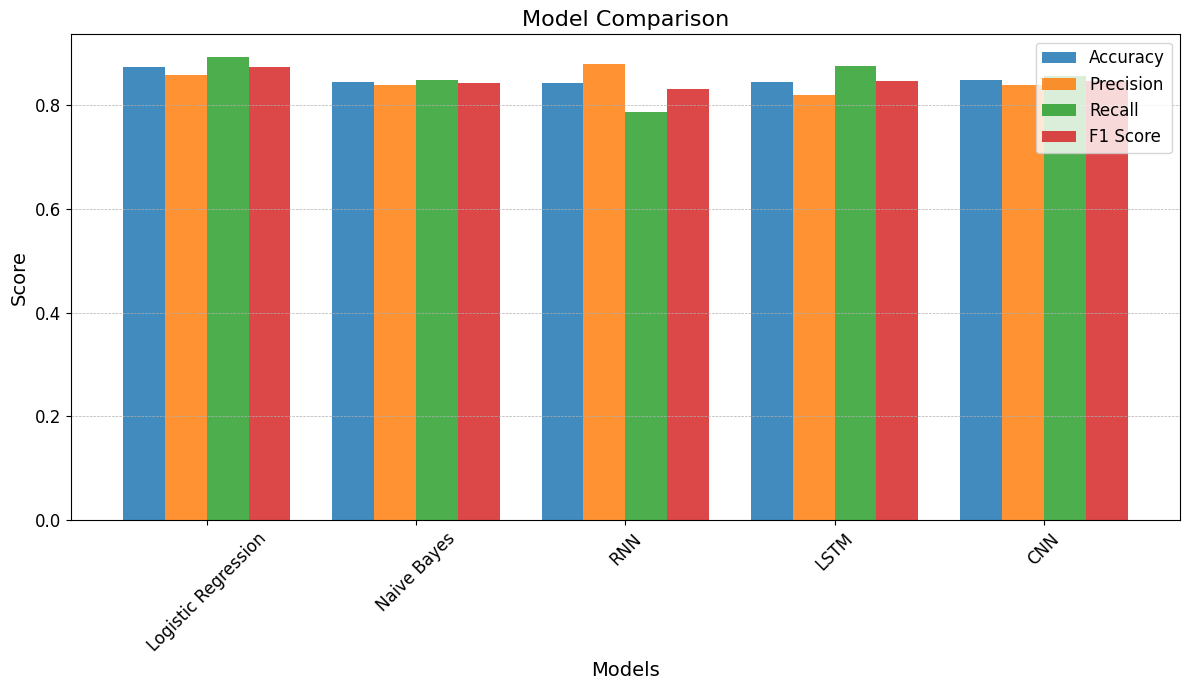

In [ ]:

import matplotlib.pyplot as plt
import pandas as pd

# Actual results from your evaluation
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'RNN', 'LSTM', 'CNN'],
    'Accuracy': [0.8747, 0.8458, 0.8435, 0.8452, 0.8494],
    'Precision': [0.8580, 0.8394, 0.8805, 0.8206, 0.8399],
    'Recall': [0.8926, 0.8484, 0.7882, 0.8763, 0.8565],
    'F1 Score': [0.8749, 0.8438, 0.8318, 0.8475, 0.8481]
})

# Plot
results.set_index('Model').plot(kind='bar', figsize=(12, 7), width=0.8, alpha=0.85)
plt.title("Model Comparison", fontsize=16)
plt.ylabel("Score", fontsize=14)
plt.xlabel("Models", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="best", fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [ ]:
import joblib

# Save the model to a file
joblib.dump(model, 'sentiment_classifier.pkl')



['sentiment_classifier.pkl']

In [ ]:
import joblib

# Load the model from the .pkl file
model = joblib.load('sentiment_classifier.pkl')

# Check model type to confirm if it is loaded correctly
print(type(model))  # Should print something like <class 'sklearn.linear_model._logistic.LogisticRegression'>


<class 'keras.src.models.sequential.Sequential'>


In [ ]:
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Sample data (replace this with your actual dataset)
data = ["The movie was great!", "I didn't like the movie", "Amazing movie, loved it!", "It was a waste of time"]
labels = [1, 0, 1, 0]  # 1 = Positive, 0 = Negative

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2)

# Create a TF-IDF vectorizer and transform the data
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Save the model and vectorizer to files
joblib.dump(model, 'sentiment_classifier.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')

print("Model and vectorizer saved successfully.")


Model and vectorizer saved successfully.


# **Building classifier**

In [ ]:
import joblib

# Load the saved model and vectorizer
model = joblib.load('sentiment_classifier.pkl')  # Load the model
vectorizer = joblib.load('vectorizer.pkl')  # Load the vectorizer

# Check model type to confirm if it is loaded correctly
print(type(model))  # Should print something like <class 'sklearn.linear_model._logistic.LogisticRegression'>


<class 'sklearn.linear_model._logistic.LogisticRegression'>


In [ ]:
# Function to predict sentiment of new review
def predict_sentiment(review):
    # Transform the review using the vectorizer
    review_vectorized = vectorizer.transform([review])

    # Predict sentiment using the loaded model
    prediction = model.predict(review_vectorized)

    # Return the sentiment as 'Positive' or 'Negative'
    sentiment = "Positive" if prediction == 1 else "Negative"
    return sentiment

# Test the function with a new review
new_review = "This movie was fantastic!"
print(f"Sentiment: {predict_sentiment(new_review)}")  # Sentiment print karen


Sentiment: Positive


In [ ]:
from collections import Counter
print(Counter(y_train))  # Check class distribution


Counter({1: 2, 0: 1})


In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_extraction.text import TfidfVectorizer  # Import if not already imported

# ... (your previous code) ...

# If X_train is not already vectorized:
vectorizer = TfidfVectorizer()  # Initialize a TfidfVectorizer
X_train_vectorized = vectorizer.fit_transform(X_train) # Transform X_train to a 2D array

# Now, use X_train_vectorized with RandomOverSampler:
oversampler = RandomOverSampler(random_state=42)
X_train_balanced, y_train_balanced = oversampler.fit_resample(X_train_vectorized, y_train)
print(Counter(y_train_balanced))  # Check balanced distribution

Counter({1: 2, 0: 2})


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [ ]:
from sklearn.linear_model import LogisticRegression
#from sklearn.feature_extraction.text import TfidfVectorizer # This line is causing the error

#vectorizer = TfidfVectorizer() # Remove this line (vectorizer already defined previously)
#X_train_vectorized = vectorizer.fit_transform(X_train_balanced) # Remove this line (X_train_balanced is already vectorized)

model = LogisticRegression()
model.fit(X_train_balanced, y_train_balanced) # Fit the model directly to the vectorized, balanced data


LogisticRegression()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Assuming 'data' is your list of strings (reviews)
# and 'labels' is a list of corresponding labels (0 or 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Create a TfidfVectorizer and fit it to the training data
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

# Now you can use the model to predict on the test data:
X_test_vectorized = vectorizer.transform(X_test)
predictions = model.predict(X_test_vectorized)

# Evaluate your model's performance
# (e.g., using accuracy_score, precision_score, etc.)

In [ ]:
# Transform the test data using the same vectorizer
X_test_vectorized = vectorizer.transform(X_test)

# Predict on the test data
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

Confusion Matrix:
[[0 1]
 [0 0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [ ]:
from collections import Counter
print("Test set distribution:", Counter(y_test))


Test set distribution: Counter({0: 1})


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
model = LogisticRegression(class_weight='balanced')


In [ ]:
print("Shape of X_train_vectorized:", X_train_vectorized.shape)
print("Length of y_train:", len(y_train))


Shape of X_train_vectorized: (3, 10)
Length of y_train: 40000


In [ ]:
# Check raw data
print("First 5 samples of X:", X[:5])
print("First 5 samples of y:", y[:5])

# Check split
print("Number of rows in X_train:", X_train.shape[0])  # Change here
print("Length of y_train:", len(y_train))

# Check vectorization
print("Shape of X_train_vectorized:", X_train_vectorized.shape)

First 5 samples of X: 0    one review mention watch oz episod youll hook ...
1    wonder littl product film techniqu unassum old...
2    thought wonder way spend time hot summer weeke...
3    basic there famili littl boy jake think there ...
4    petter mattei love time money visual stun film...
Name: processed_reviews, dtype: object
First 5 samples of y: 0    positive
1    positive
2    positive
3    negative
4    positive
Name: sentiment, dtype: object
Number of rows in X_train: 40000
Length of y_train: 40000
Shape of X_train_vectorized: (3, 10)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'df' is your DataFrame containing 'processed_reviews' and 'sentiment'
X_text = df['processed_reviews']  # Get the raw text data
y = df['sentiment']  # Labels

# Split the data into train and test sets using the raw text data
X_train_text, X_test_text, y_train, y_test = train_test_split(X_text, y, test_size=0.2, random_state=42, stratify=y)

# Create a TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the training text data and transform it
X_train_vectorized = vectorizer.fit_transform(X_train_text)

# Transform the test data using the fitted vectorizer
X_test_vectorized = vectorizer.transform(X_test_text)

# Verify vectorization
print("Shape of X_train_vectorized:", X_train_vectorized.shape)
print("Shape of X_test_vectorized:", X_test_vectorized.shape)



Shape of X_train_vectorized: (40000, 149931)
Shape of X_test_vectorized: (10000, 149931)


In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vectorized, y_train)

# Verify resampled data
print("Shape of X_train_resampled:", X_train_resampled.shape)
print("Length of y_train_resampled:", len(y_train_resampled))


Shape of X_train_resampled: (40000, 149931)
Length of y_train_resampled: 40000


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Train the Logistic Regression model
model = LogisticRegression(max_iter=500, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      5000
    positive       0.88      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Accuracy: 0.8903


In [ ]:
new_data = ["I love this course!", "This course was terrible."]
new_data_vectorized = vectorizer.transform(new_data)
predictions = model.predict(new_data_vectorized)
print(predictions)


['positive' 'negative']


In [ ]:
# Take input from the user
user_input = input("Enter a review: ")

# Vectorize the input (apply the same preprocessing as in training)
user_input_vectorized = vectorizer.transform([user_input])

# Predict the sentiment using the trained model
prediction = model.predict(user_input_vectorized)

# Output the prediction (positive or negative)
if prediction[0] == 'positive':
    print("The sentiment of the review is positive!")
else:
    print("The sentiment of the review is negative!")


Enter a review: wow, good
The sentiment of the review is positive!
